## Naive Bayes

#### Bag of Words

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('../../../data/processed/tokenized_data_sample_with_custom_stopwords.csv')
X_train, X_test, y_train, y_test = train_test_split(df['reviewTokens'], df['overall'], test_size=0.2, random_state=42)

X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Initialize and fit the CountVectorizer to transform text data into bag-of-words vectors
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [6]:
# Initialize and train the SVM model
model = SVC(kernel='linear')  
model.fit(X_train_bow, y_train)

# Predict the target variable for test data
y_pred = model.predict(X_test_bow)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.55      0.71      0.62      1202
         2.0       0.25      0.16      0.19       769
         3.0       0.33      0.30      0.32      1131
         4.0       0.40      0.25      0.30      1682
         5.0       0.77      0.87      0.82      5216

    accuracy                           0.63     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.59      0.63      0.60     10000



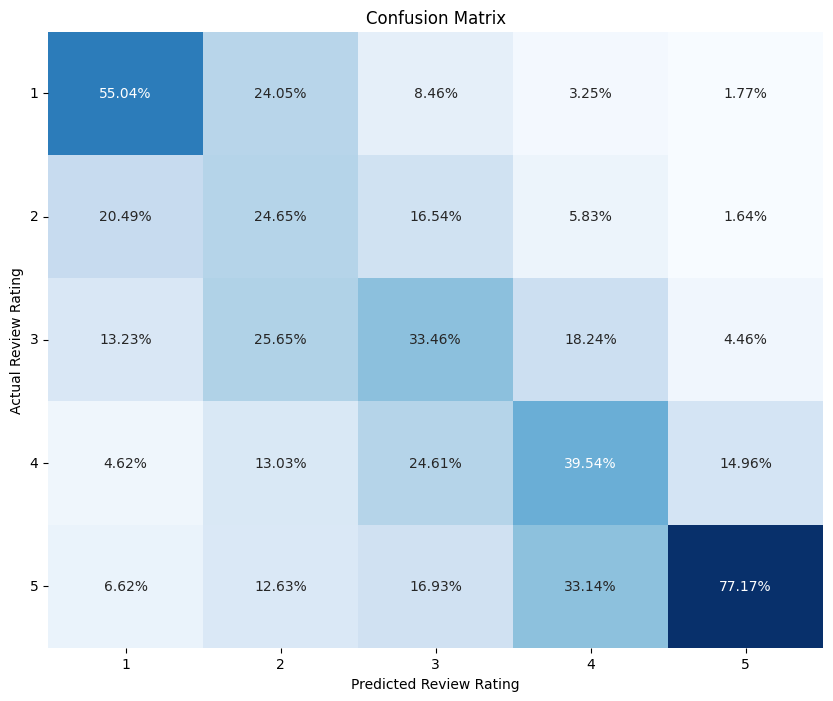

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


#### Bag Of Words with class weighting

In [18]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# Initialize and train the SVM model
model = SVC(kernel='linear', class_weight=class_weights)  
model.fit(X_train_bow, y_train)

# Predict the target variable for test data
y_pred = model.predict(X_test_bow)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.53      0.66      0.59      1202
         2.0       0.22      0.27      0.25       769
         3.0       0.30      0.34      0.32      1131
         4.0       0.35      0.35      0.35      1682
         5.0       0.85      0.75      0.80      5216

    accuracy                           0.59     10000
   macro avg       0.45      0.47      0.46     10000
weighted avg       0.62      0.59      0.60     10000



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()

#### Word2Vec

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('../../../data/processed/tokenized_data_sample_with_custom_stopwords.csv')

# Load the vectorized features from the .npy file
vectorized_features = np.load('../../../data/processed/sample_vectorized_features_with_custom_stopwords_word2vec.npy')

feature_vectors = pd.DataFrame(vectorized_features)


feature_vectors.columns = [f'vec_feature_{i}' for i in range(feature_vectors.shape[1])]

X = feature_vectors # Feature vector
y = df['overall']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
model = SVC(kernel='linear')  
model.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1202
         2.0       0.00      0.00      0.00       769
         3.0       0.00      0.00      0.00      1131
         4.0       0.00      0.00      0.00      1682
         5.0       0.52      1.00      0.69      5216

    accuracy                           0.52     10000
   macro avg       0.10      0.20      0.14     10000
weighted avg       0.27      0.52      0.36     10000



C:\Users\lucym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lucym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lucym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

Model is predicting all reviews as 5 stars.

C:\Users\lucym\AppData\Local\Temp\ipykernel_9040\4192109607.py:7: RuntimeWarning: invalid value encountered in divide
  conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)


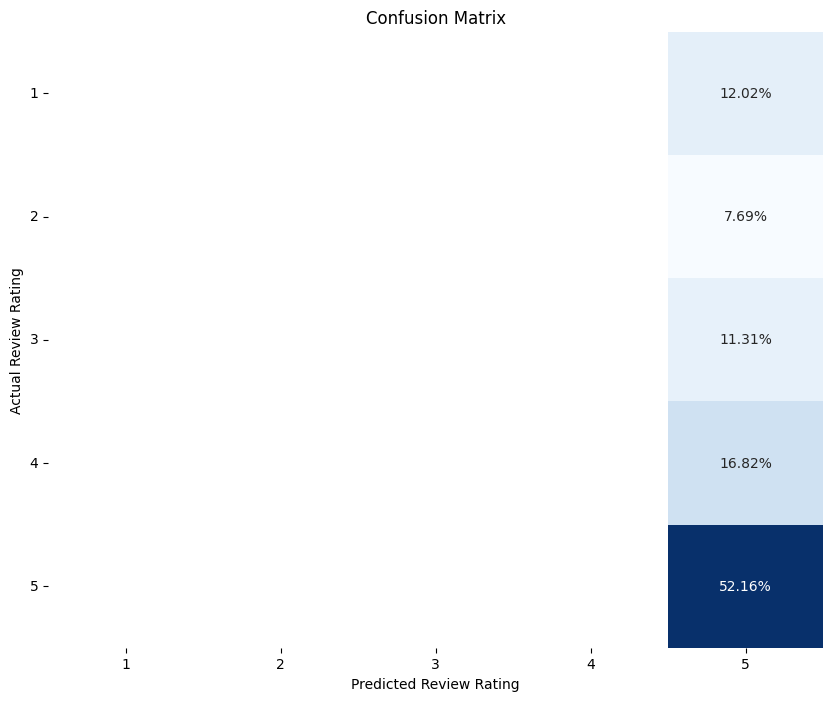

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


#### Word2Vec with class weighting

In [14]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# Initialize and train the SVM model
model = SVC(kernel='linear', class_weight=class_weights)  
model.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.27      0.35      0.30      1202
         2.0       0.11      0.38      0.17       769
         3.0       0.20      0.26      0.23      1131
         4.0       0.22      0.22      0.22      1682
         5.0       0.77      0.42      0.54      5216

    accuracy                           0.35     10000
   macro avg       0.32      0.32      0.29     10000
weighted avg       0.50      0.35      0.39     10000



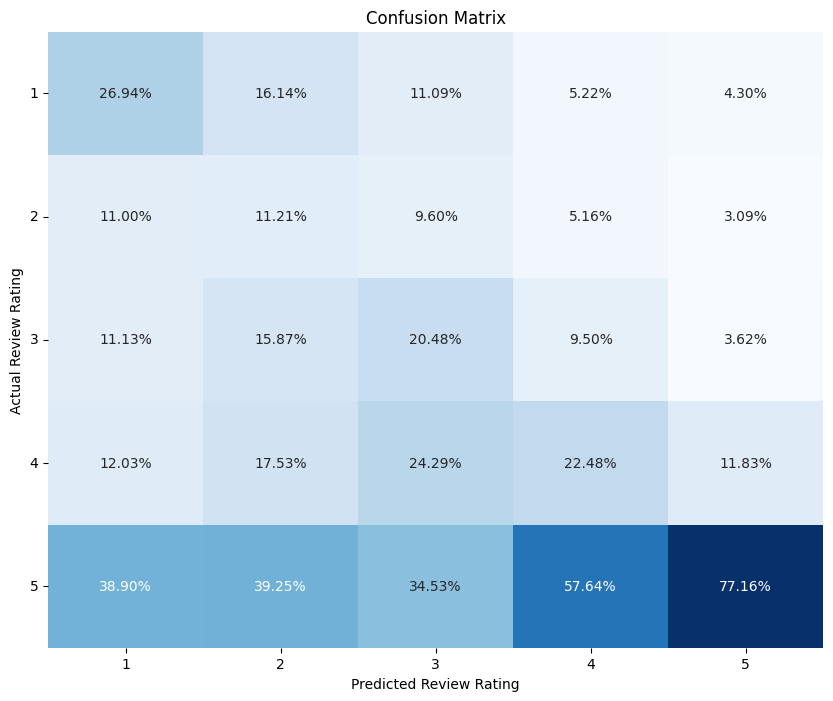

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()
